<a href="https://colab.research.google.com/github/manjuiitm/MLP/blob/main/Voting_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Voting Classifier
A voting classifier is a machine learning model that gains experience by training on a collection of several models and forecasts an output (class) based on the class with the highest likelihood of becoming the output. To forecast the output class based on the largest majority of votes, it averages the results of each classifier provided into the voting classifier. The concept is to build a single model that learns from various models and predicts output based on their aggregate majority of votes for each output class, rather than building separate specialized models and determining the accuracy for each of them.

There are primarily two different types of voting classifiers:

Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes, i.e., the class with the highest probability of being predicted by each classifier. For example, let's say classifiers predicted the output classes as (Cat, Dog, Dog). As the classifiers predicted class "dog" a maximum number of times, we will proceed with Dog as our final prediction.
Soft Voting: In this, the average probabilities of the classes determine which one will be the final prediction. For example, let's say the probabilities of the class being a "dog" is (0.30, 0.47, 0.53) and a "cat" is (0.20, 0.32, 0.40). So, the average for a class dog is 0.4333, and the cat is 0.3067, from this, we can confirm our final prediction to be a dog as it has the highest average probability.

---



In [5]:
import numpy as np
import warnings
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [6]:
# Load the iris dataset from sklearn datasets
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [10]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target
# Create three different classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# Print a header for the cross-validation results
print('5-fold cross validation:\n')

# Create a list of labels for the classifiers
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([clf1, clf2, clf3], labels):

    # Use cross_val_score to compute accuracy scores using 5-fold cross-validation
    scores = model_selection.cross_val_score(clf, X, y,
                                              cv=5,
                                              scoring='accuracy')

    # Print the mean accuracy and standard deviation of accuracy for the current classifier
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


5-fold cross validation:

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]


In [12]:
# Create a Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[2], clf3),  # Include the third classifier (Naive Bayes)
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
)

In [13]:
# Create a Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[
        (labels[0], clf1),  # Include the first classifier (Logistic Regression)
        (labels[1], clf2),  # Include the second classifier (Random Forest)
        (labels[2], clf3),  # Include the third classifier (Naive Bayes)
    ],
    voting='soft'  # Specify soft voting, where class probabilities are combined
)

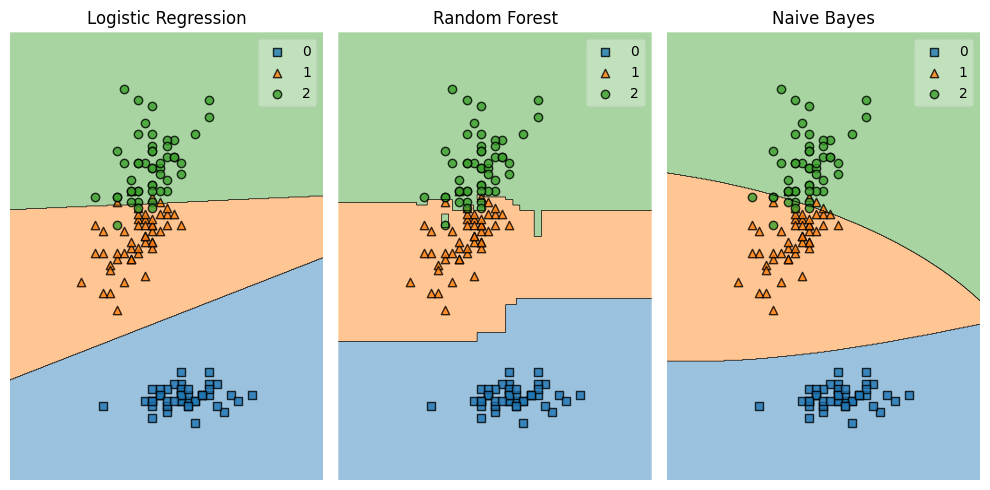

In [14]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()


clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)

classifiers = [clf1, clf2, clf3]
titles = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(classifiers, titles, axes.flatten()):
    plot_decision_regions(X, y, clf=clf, ax=ax)
    ax.set_title(title)
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('3 classifiers.png')
plt.show()

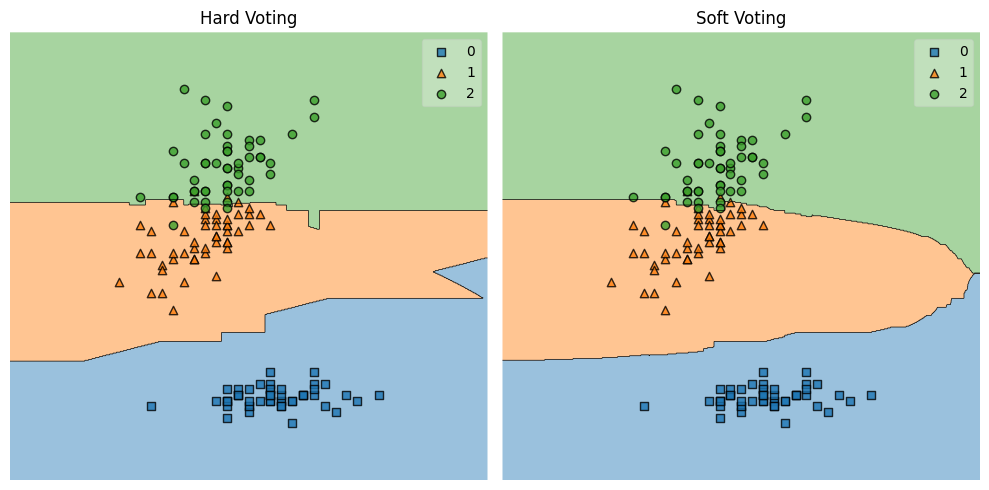

In [15]:
voting_clf_hard.fit(X,y)
voting_clf_soft.fit(X,y)


classifiers = [voting_clf_hard, voting_clf_soft]
titles = ['Hard Voting','Soft Voting']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(classifiers, titles, axes.flatten()):
    plot_decision_regions(X, y, clf=clf, ax=ax)
    ax.set_title(title)
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('voting.png')
plt.show()